<a href="https://colab.research.google.com/github/gohenry/DataScienceCoursera/blob/master/ArtAuction_7pm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount ('/content/drive', force_remount = True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [7]:
cd drive/My Drive

/content/drive/My Drive


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import functools

import numpy as np
import tensorflow as tf
import pandas as pd


In [19]:
!pip install -q xlrd

import pandas as pd
df = pd.read_excel('result_2017_2018.xlsx')
df


,num_author,creation_year,height,width,estimate_low,estimate_high,auction_year,artist_birth,artist_death,hammer price
0,1,1983.0,14.0,10.0,80669.0,141170.0,2018.0,1928.0,1987.0,161338.0
1,1,1982.0,14.0,11.0,92678.0,139017.0,2018.0,1928.0,1987.0,NaN
2,1,1984.0,20.0,16.0,91964.0,118239.0,2018.0,1928.0,1987.0,128750.0
3,1,1982.0,8.0,16.0,131377.0,197066.0,2018.0,1928.0,1987.0,105102.0
4,1,1982.0,8.0,16.0,131378.0,197067.0,2018.0,1928.0,1987.0,NaN
...,...,...,...,...,...,...,...,...,...,...
1453,100,1999.0,8.0,66.0,2117691.0,2911825.0,2018.0,1923.0,2015.0,2183869.0
1454,100,2012.0,6.0,120.0,1800000.0,2500000.0,2018.0,1923.0,2015.0,1900000.0
1455,100,1986.0,2.0,94.0,3500000.0,4500000.0,2018.0,1923.0,2015.0,4343000.0
1456,100,1989.0,76.0,114.0,3000000.0,5000000.0,2017.0,1923.0,2015.0,3300000.0


In [0]:
df=df.drop(columns=['artist_death'])

In [0]:
df = df.apply(pd.to_numeric, errors='coerce')
df = df.dropna()


In [22]:
df

,num_author,creation_year,height,width,estimate_low,estimate_high,auction_year,artist_birth,hammer price
0,1,1983.0,14.0,10.0,80669.0,141170.0,2018.0,1928.0,161338.0
2,1,1984.0,20.0,16.0,91964.0,118239.0,2018.0,1928.0,128750.0
3,1,1982.0,8.0,16.0,131377.0,197066.0,2018.0,1928.0,105102.0
5,1,1982.0,6.0,20.0,91964.0,131378.0,2018.0,1928.0,72258.0
6,1,1986.0,22.0,22.0,131377.0,197066.0,2018.0,1928.0,170791.0
...,...,...,...,...,...,...,...,...,...
1453,100,1999.0,8.0,66.0,2117691.0,2911825.0,2018.0,1923.0,2183869.0
1454,100,2012.0,6.0,120.0,1800000.0,2500000.0,2018.0,1923.0,1900000.0
1455,100,1986.0,2.0,94.0,3500000.0,4500000.0,2018.0,1923.0,4343000.0
1456,100,1989.0,76.0,114.0,3000000.0,5000000.0,2017.0,1923.0,3300000.0


In [0]:
# remove rows with NaN on column 'hammer price'
#df = df[np.isfinite(df['hammer price'])]
#df = df[np.isfinite(df['creation_year'])]
#df = df[np.isfinite(df['estimate_low'])]
#df = df[np.isfinite(df['auction_year'])]
#df = df[np.isfinite(df['artist_birth'])]
#df

,num_author,creation_year,height,width,estimate_low,estimate_high,auction_year,artist_birth,artist_death,hammer price,log hammer price,binned
0,1,1983.0,14.0,10.0,80669.0,141170.0,2018.0,1928.0,1987.0,161338.0,11.991257,12
2,1,1984.0,20.0,16.0,91964.0,118239.0,2018.0,1928.0,1987.0,128750.0,11.765628,12
3,1,1982.0,8.0,16.0,131377.0,197066.0,2018.0,1928.0,1987.0,105102.0,11.562687,12
5,1,1982.0,6.0,20.0,91964.0,131378.0,2018.0,1928.0,1987.0,72258.0,11.187998,12
6,1,1986.0,22.0,22.0,131377.0,197066.0,2018.0,1928.0,1987.0,170791.0,12.048196,14
...,...,...,...,...,...,...,...,...,...,...,...,...
1453,100,1999.0,8.0,66.0,2117691.0,2911825.0,2018.0,1923.0,2015.0,2183869.0,14.596609,16
1454,100,2012.0,6.0,120.0,1800000.0,2500000.0,2018.0,1923.0,2015.0,1900000.0,14.457364,16
1455,100,1986.0,2.0,94.0,3500000.0,4500000.0,2018.0,1923.0,2015.0,4343000.0,15.284076,16
1456,100,1989.0,76.0,114.0,3000000.0,5000000.0,2017.0,1923.0,2015.0,3300000.0,15.009433,16


In [23]:
df.dtypes

num_author         int64
creation_year    float64
height           float64
width            float64
estimate_low     float64
estimate_high    float64
auction_year     float64
artist_birth     float64
hammer price     float64
dtype: object

In [0]:
df['log hammer price'] = np.log10(df['hammer price'])

In [29]:
df.dtypes

num_author            int64
creation_year       float64
height              float64
width               float64
estimate_low        float64
estimate_high       float64
auction_year        float64
artist_birth        float64
hammer price        float64
log hammer price    float64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f134b3aaba8>]],
      dtype=object)

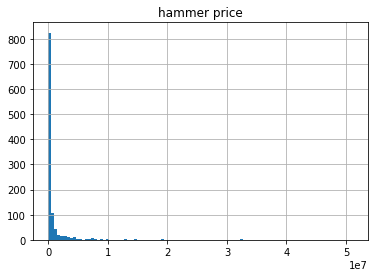

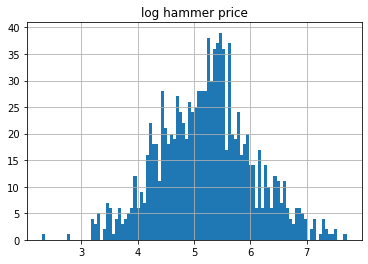

In [30]:
df.hist(column='hammer price', bins=100)
df.hist(column='log hammer price', bins=100)

In [32]:
bins = [0,3,4,5,6,7,8]
labels = [0,1,2,3,4,5]
df['binned'] = pd.cut(df['log hammer price'], bins=bins, labels=labels)
print(df)

      num_author  creation_year  height  ...  hammer price  log hammer price  binned
0              1         1983.0    14.0  ...      161338.0          5.207737       3
2              1         1984.0    20.0  ...      128750.0          5.109747       3
3              1         1982.0     8.0  ...      105102.0          5.021611       3
5              1         1982.0     6.0  ...       72258.0          4.858886       2
6              1         1986.0    22.0  ...      170791.0          5.232465       3
...          ...            ...     ...  ...           ...               ...     ...
1453         100         1999.0     8.0  ...     2183869.0          6.339227       4
1454         100         2012.0     6.0  ...     1900000.0          6.278754       4
1455         100         1986.0     2.0  ...     4343000.0          6.637790       4
1456         100         1989.0    76.0  ...     3300000.0          6.518514       4
1457         100         1978.0     2.0  ...     1500000.0       

In [0]:
dataset = df.values
X = dataset[:,0:8]
Y = dataset[:,10]

In [34]:
X

array([[1, 1983.0, 14.0, ..., 141170.0, 2018.0, 1928.0],
       [1, 1984.0, 20.0, ..., 118239.0, 2018.0, 1928.0],
       [1, 1982.0, 8.0, ..., 197066.0, 2018.0, 1928.0],
       ...,
       [100, 1986.0, 2.0, ..., 4500000.0, 2018.0, 1923.0],
       [100, 1989.0, 76.0, ..., 5000000.0, 2017.0, 1923.0],
       [100, 1978.0, 2.0, ..., 2500000.0, 2017.0, 1923.0]], dtype=object)

In [35]:
Y

array([3, 3, 3, ..., 4, 4, 4], dtype=object)

In [36]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
dummy_y = np_utils.to_categorical(encoded_Y) 
dummy_y

Using TensorFlow backend.


array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, dummy_y, test_size=0.25)
print(X_train.shape, Y_train.shape,X_test.shape, Y_test.shape)
print(X_test[0])

(825, 8) (825, 6) (276, 8) (276, 6)
[3 1999.0 8.0 15.0 10586.0 15879.0 2017.0 1932.0]


In [0]:
#X_train = np.where(np.isfinite(X_train), X_train, 0)
#X_test = np.where(np.isfinite(X_test), X_test, 0)
#print(X_train.shape)
#print(X_test.shape)
#Y_train = np.where(np.isfinite(Y_train), Y_train, 0)
#Y_test = np.where(np.isfinite(Y_test), Y_test, 0)

TypeError: ignored

In [47]:
Y_test

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

In [48]:
#maxPrice = Y_train.max()
#Y_train = Y_train / maxPrice
#Y_test = Y_test / maxPrice
df.dtypes

num_author             int64
creation_year        float64
height               float64
width                float64
estimate_low         float64
estimate_high        float64
auction_year         float64
artist_birth         float64
hammer price         float64
log hammer price     float64
binned              category
dtype: object

In [49]:
print(X_train[1].shape,X_test.shape,Y_train.shape,Y_test.shape)

(8,) (276, 8) (825, 6) (276, 6)


In [50]:
X_train[1].shape

(8,)

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#print(X_train[0])
#print(X_train_scaled[0])
print(X_test[0])
#print(X_test_scaled[0])


[3 1999.0 8.0 15.0 10586.0 15879.0 2017.0 1932.0]


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

#Create model
model = Sequential()

#Add more layers
model.add(Dense(16, activation='relu', input_shape = (8,), kernel_initializer='normal'))
model.add(Dense(16, activation='relu', kernel_initializer='normal'))
model.add(Dense(6, activation='softmax', kernel_initializer='normal'))

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [55]:
hist = model.fit(X_train_scaled, Y_train, batch_size=32, epochs=60,validation_split=0.1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 742 samples, validate on 83 samples
Epoch 1/60





742/742 [==============================] - 1s 1ms/step - loss: 1.7781 - acc: 0.4245 - val_loss: 1.7569 - val_acc: 0.4578
Epoch 2/60
742/742 [==============================] - 0s 48us/step - loss: 1.7283 - acc: 0.4542 - val_loss: 1.6767 - val_acc: 0.4578
Epoch 3/60
742/742 [==============================] - 0s 51us/step - loss: 1.6144 - acc: 0.4542 - val_loss: 1.5089 - val_acc: 0.4578
Epoch 4/60
742/742 [==============================] - 0s 64us/step - loss: 1.4195 - acc: 0.4542 - val_loss: 1.3095 - val_acc: 0.4578
Epoch 5/60
742/742 [==============================] - 0s 56us/step - loss: 1.2668 - acc: 0.4542 - val_loss: 1.2016 - val_acc: 0.4578
Epoch 6/60
742/742 [==============================] - 0s 58us/step - loss: 1.1908 - acc: 0.4542 - val_loss: 1.1421 - val_acc: 0.4578
Epoch 7/60
742/742 [==============================] - 0s

In [56]:
model.evaluate(X_test_scaled, Y_test)

276/276 [==============================] - 0s 65us/step


[0.5603954714277516, 0.7717391295709471]

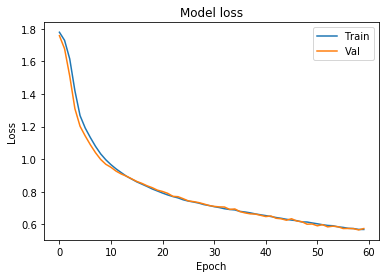

In [57]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()

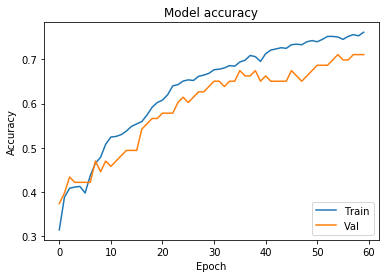

In [0]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'lower right')
plt.show()